In [1]:
import reader
import utils
import visualization as vis
from PIL import Image
import numpy as np
import cv2
import datagen
import matplotlib.pyplot as plt

In [2]:
# Read data
kitti_reader = reader.KittiReader()

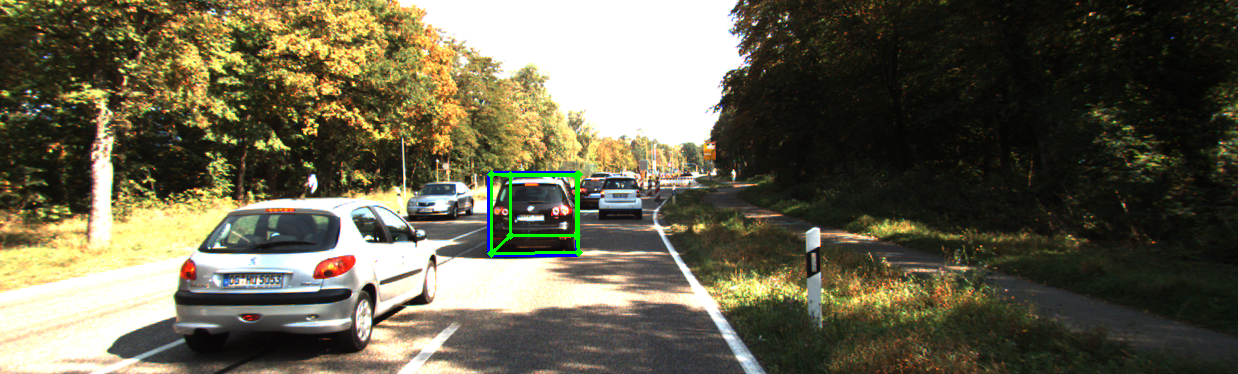

In [3]:
# Visualize
j = 4299
obj = kitti_reader.image_data[j]
image_path = obj['image']
calib_path = obj['calib']
K = reader.KittiReader.read_intrinsic_matrix(calib_path)
image_data = list(filter(lambda rec: rec['image'] == image_path, kitti_reader.image_data))
img = cv2.imread(image_path)

cv2.rectangle(img, (obj['xmin'], obj['ymin']), (obj['xmax'], obj['ymax']), (255, 0, 0), 4)
coords_3d = utils.compute_3d_coordinates(K,
                                    obj['trans'], 
                                    obj['alpha'], 
                                    obj['dims'], 
                                    (obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax']))
coords_2d = utils.project_2d(K, coords_3d)
vis.draw_3d_box(img, coords_2d)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(img)

rot local  272.72791048227185
Annot angle:  4.763185307179587 Recovered angle :  4.76
rot global  267.36851286799543
Annot dims:  [1.52 1.67 4.38] Recovered dims :  [1.52 1.67 4.38]
Annot translation :  [-1.41  1.38 16.03]  Recovered trans;ation :  [-1.38  1.36 15.49]


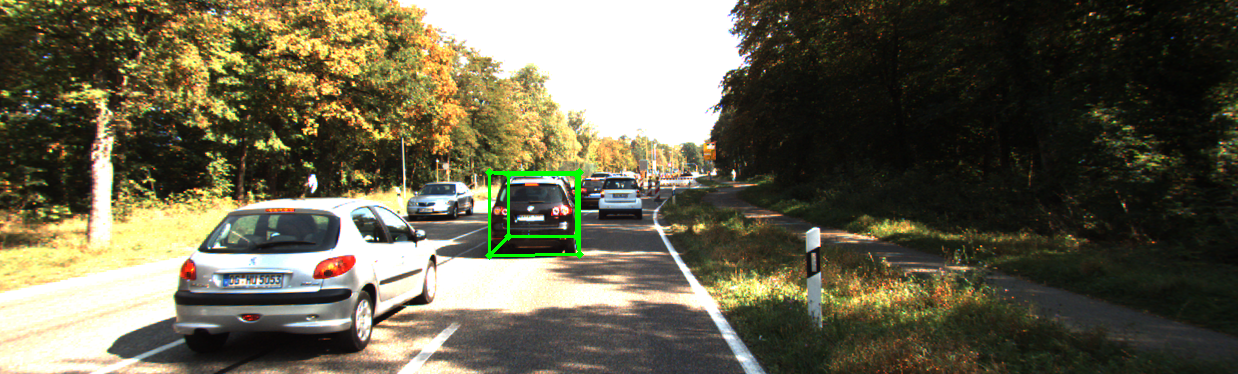

In [4]:
gen = datagen.BatchGenerator(kitti_reader, jitter = False, mode = 'train')

x, y = gen.__getitem__(0)

x = gen.visualize(4299)
Image.fromarray(cv2.cvtColor(x[0], cv2.COLOR_BGR2RGB))